Inserting an image.

<img src="APOD.jpg" style="width:200px;height:400px"/>

# 11 Steps to Start with Image Processing

OpenCV and Python: the basics of the super-popular image processing library


0. Install OpenCV

To install the OpenCV Python 3 API use pip.

In [1]:
pip install opencv-python

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


1. Import images

After installation, importing the package named cv2. Also importing matplotlib to show the results of experiments.

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

2. Read an image

Already passed img path. Using the function cv.imread() to import and read the image as a Numpy Array.

In [10]:
IMG_PATH = r"C:\Users\KIIT\Downloads\imgOpencv\APOD.jpg"

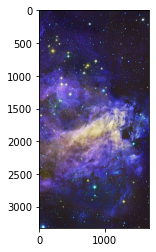

In [11]:
imgArray = cv.imread(IMG_PATH)
#showing the contents of image by using matplotlib:
plt.imshow(imgArray)

This 8 bit (compressed) JPEG image was acquired with my 80/480 refractor and a Canon EOS 60D. It has three channels (R,G,B) and a resolution of about 2,048 x 1,328.

Unfortunately, as we can see, image colours are definitely staggered.

OpenCV, in fact, uses the BGR triad rather than RGB as a standard.
It is, therefore, necessary to convert the image and put the channels in the right place: from BGR to RGB.

### 4. Rearrange channels: from BGR to RGB

To put the channels in the correct order and adapt them to the RGB color space we can use the cv.cvtColor() function passing COLOR_BGR2RGB as conversion argument.

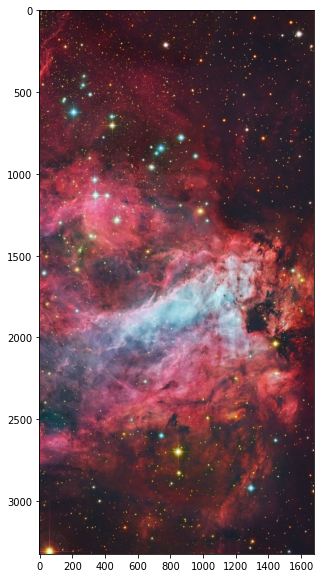

In [12]:
convertedArray = cv.cvtColor(imgArray, cv.COLOR_BGR2RGB)
plt.subplots(figsize=(15,10))
plt.imshow(convertedArray); plt.show()

Now we can see original img.

### 5. Show the channels separately
Since image is actually a stack of 3 different matrices (one for each color channel R, G and B), Now i will show each one separately.

Using the numpy syntax to slice the cube.

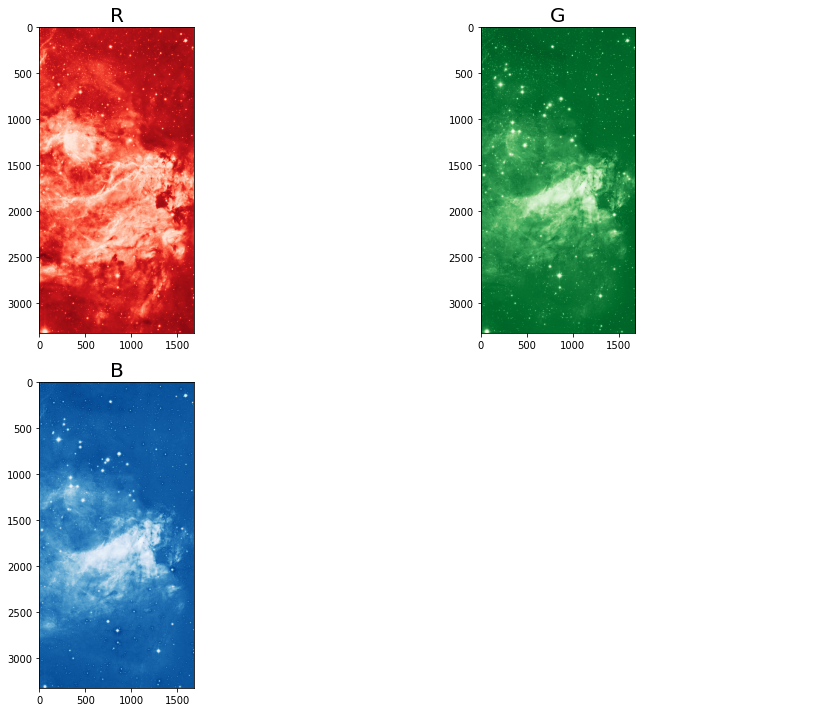

In [15]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(14,10))
ax1.imshow(convertedArray[:,:,0], cmap="Reds_r"); ax1.set_title("R", size=20)
ax2.imshow(convertedArray[:,:,1], cmap="Greens_r"); ax2.set_title("G", size=20)
ax3.imshow(convertedArray[:,:,2], cmap="Blues_r"); ax3.set_title("B", size=20)

ax4.axis("off"); plt.tight_layout(); plt.show()

### 6. Visualize histograms
Histograms and images. 

The histogram of a channel can tell us how digital numbers are distributed within each channel. For example, by analyzing a single histogram we are able to know if dark or light areas prevail.

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

ax1.hist(convertedArray[:,:,0].flatten(), color="R", bins=200); ax1.set_title("R", size=20)
ax2.hist(convertedArray[:,:,1].flatten(), color="G", bins=200); ax2.set_title("G", size=20)
ax3.hist(convertedArray[:,:,2].flatten(), color="B", bins=200); ax3.set_title("B", size=20)

plt.tight_layout(); plt.show()

NOTE:flatten()function was used here to unwrap the array.

Sky background pixels are dark and, since they prevail, they move the histograms (Fig.4) towards relatively low dynamic values

In [18]:
type(convertedArray) #numpy.ndarray

numpy.ndarray

So it has the classic dtype attribute that we can use to know the bit depth of the image.

In [19]:
convertedArray.dtype #dtype('uint8')

dtype('uint8')

This is 8 bit image. It was something we could expect since it’s a JPEG.

This means the clearest pixel in the image has a value of 255, the darkest 0.

In [20]:
convertedArray.min() #0
convertedArray.max() #255

255

### 8. Crop an image
Before we crop the image, let’s find out its (geometric) size by using the shape attribute:

In [21]:
convertedArray.shape #see below

(3324, 1681, 3)

rows,column,channels(RGB)

To crop the image we can simply use numpy indexing methods.

For example, to take the first 200 rows and the first 300 columns (of all channels) we can simply write this:

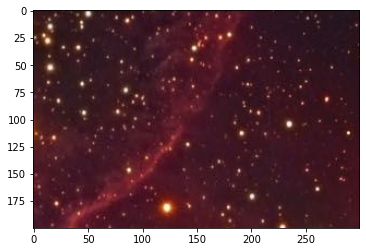

In [22]:
crop1 = convertedArray[:200, :300, :]
crop1.shape #
plt.imshow(crop1); plt.show()

In [ ]:
crop2 = convertedArray[600:900,350:1250,:]

plt.figure(gigsize=(15,8))
plt.imshow(crop2); plt.show()

If instead, we wanted to crop only one channel (the first one) we just need to

In [ ]:
plt.figure(figsize=(15,8))

plt.imshow(convertedArray[600:900,350:1250,:], cmap="Greys_r"); plt.show()

### 9. Number of pixels

How many pixels are present in the image? To answer this question, just multiply the number of pixels on the long side by the number of pixels on the short side.

In [ ]:
convertedArray.shape

ConvertedArray.shape[0] * convertedArray.shape[1]

### 10. Dissecting an image
Suppose you want to extract a vertical and a horizontal section from the image.

In [ ]:
plt.subplots(figsize=(15,10))

plt.imshow(convertedArray)
plt.axvline(1000, color="yellow")
plt.axhline(600,color="orange")

plt.show()

In [ ]:
horSection = convArray[600,:,:]
plt.figure(figsize=(16,5))

plt.plot(horSection[:,0], label="R", color="#e74c3c")
plt.plot(horSection[:,1], label="G", color="#e74c8c")
plt.plot(horSection[:,2], label="B", color="#e74c7c")

plt.xlabel("X"); plt.legend(); plt.show()